-- Jelena Lor --

I am finance professional passionate about Data Science/ Analytics.

_May 2019_

This is my first attempt at this dataset. I am trying to get better at analyzing and visualizing data. Here I am exploring interactive charts capabilities. <br> 
Unfortunately interactive widgets do not work with Kaggle servers but you can run it locally to explore the visualizations.
<br>
<br>
Any feedback or comments are highly appreciated!


-- Jacob Ayers --
<br>
_October_2022_
<br>
Lightly modified for the Correlates of War project's Trade (v4.0) dataset

__Table of Content__

1. Library Import
2. Data Import
3. Data Wrangling
4. Code
5. Visualisation

##  Library Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid",{'axes.axisbelow': False,'grid.color': 'w','axes.spines.bottom': False, 'axes.spines.left': False, 'axes.spines.right': False,
 'axes.spines.top': False})
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, widgets, Layout, fixed
import geopandas as gpd

##  Data Import

In [2]:
data = pd.read_csv("National_Import_Export.csv")


##  Code

In [11]:
def mapImportExportByYear(data, year, category, normalization):
    # Import Geopandas World Dataset to map countries
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    # testing out a different projection, this one will drop Antarctica
    world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

    world = world.to_crs("EPSG:3395")
    fig, (ax,ax2) = plt.subplots(2,1, figsize=(12,12), gridspec_kw = {'height_ratios': [4, 1],'width_ratios':[1]})
    year_subset = data[data["year"]==year]
    vmin = None
    vmax = None
    
    if normalization and (category == "imports" or category == "exports"):
        year_subset[category] = year_subset[category]/year_subset[category].sum()
        vmin = 0.0
        vmax = 0.30
    elif normalization and category == "imports_yearly_difference":
        category = "imports_yearly_percentage_difference"
        vmin = -1.0
        vmax = 1.0
        
    elif normalization and category == "exports_yearly_difference":
        category = "exports_yearly_percentage_difference"
        vmin = -1.0
        vmax = 1.0
        
        
    elif category == "net(exports-imports)" and not normalization:
        # forcing the center to be zero
        vmax = min(year_subset[category].max(),abs(year_subset[category].min()))
        vmin = vmax * -1
    # this will create a biased normalization since the net pos and net negatives will be different
    # but in both cases I am normalizing them down to [-1,1]
    elif category == "net(exports-imports)" and normalization:
        year_subset[category] = year_subset[category]/(year_subset["imports"]+year_subset["exports"])
        vmin = -1
        vmax = 1
            
    
    data_pivot_total = pd.pivot_table(year_subset, index = "country", values = category,
                                     aggfunc = "sum", fill_value = 0)
    
    world_subplot = world.merge(data_pivot_total, left_on="name",right_on = "country", how="left").fillna(value=0)
    print(category)
    world_subplot.plot(ax=ax,legend=True,vmin = vmin,vmax=vmax,column=category,cmap="coolwarm",edgecolor = 'black')
    
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.set_title("Year: " + str(year), fontsize = 20, loc = "left")
    
    ax2.set_xlim(data["year"].min(),data["year"].max())
    ax2.set_ylim(0,10)
    y = 5
    plt.hlines(y,data["year"].min(),data["year"].max())
    plt.vlines(data["year"].min(), y - 4 / 2., y + 4 / 2.)
    plt.vlines(data["year"].max(), y - 4 / 2., y + 4 / 2.)
    plt.plot(year,y,'ro',ms=12, mfc='r')
    plt.text(data["year"].min() - 0.4, y, str(data["year"].min()), horizontalalignment='right')
    plt.text(data["year"].max() + 0.4, y, str(data["year"].max()), horizontalalignment='left')
    ax2.get_yaxis().set_visible(False)
    ax2.get_xaxis().set_visible(False)
    plt.annotate(str(year),(year,y), xytext = (year,y-3))
    plt.annotate('Year:',(data["year"].min(),y), xytext = (data["year"].min()-6,y-3))
    
    
    
    #print("Top 5 countries")
    
    top5 = data_pivot_total.sort_values(by = category , ascending = False)[:5]
    i = 1
    print("Highest 5 - ")
    for c, v in zip(top5.index, top5[category].values):
        
        test = ''
        test = str(round(v,3))
        if normalization:
            test = str(round(v*100.0,3))+'%'
        print(str(i) + ". " + str(c) + " - " + test)
        i += 1
    if category == "net(exports-imports)" and normalization:
        print("\n\n Lowest 5 - ")
        top5 = data_pivot_total.sort_values(by = category , ascending = True)[:5]

        i = 1
        for c, v in zip(top5.index, top5[category].values):
            test = ''
            test = str(round(v,3))
            if normalization:
                test = str(round(v*100.0,3))+'%'
            print(str(i) + ". " + str(c) + " - " + test)
            i += 1
    
    plt.show()

mapByYear = interactive(mapImportExportByYear,data=fixed(data), 
                        year = widgets.IntSlider(min = 1870, max = 2014, step = 1, value = 10),
                        category=widgets.Dropdown(options=["imports","exports","net(exports-imports)","imports_yearly_difference","exports_yearly_difference"],value="imports",description="Display Info: ",disabled=False),
                        normalization=widgets.Dropdown(options=[False,True],value=False,description="Normalization",disabled=False))

##  Visualization

In [12]:
mapByYear

interactive(children=(IntSlider(value=1870, description='year', max=2014, min=1870), Dropdown(description='Dis…

## Animation

In [26]:
def mapImportExportByYearAnimation(data,year, category, normalization):
    # Import Geopandas World Dataset to map countries
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    # testing out a different projection, this one will drop Antarctica
    world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

    world = world.to_crs("EPSG:3395")
    fig, (ax,ax2) = plt.subplots(2,1, figsize=(12,12), gridspec_kw = {'height_ratios': [4, 1],'width_ratios':[1]})
    year_subset = data[data["year"]==year]
    vmin = None
    vmax = None
    
    if normalization and (category == "imports" or category == "exports"):
        year_subset[category] = year_subset[category]/year_subset[category].sum()
        vmin = 0.0
        vmax = 0.30
    elif normalization and category == "imports_yearly_difference":
        category = "imports_yearly_percentage_difference"
        vmin = -1.0
        vmax = 1.0
        
    elif normalization and category == "exports_yearly_difference":
        category = "exports_yearly_percentage_difference"
        vmin = -1.0
        vmax = 1.0
        
        
    elif category == "net(exports-imports)" and not normalization:
        # forcing the center to be zero
        vmax = min(year_subset[category].max(),abs(year_subset[category].min()))
        vmin = vmax * -1
    # this will create a biased normalization since the net pos and net negatives will be different
    # but in both cases I am normalizing them down to [-1,1]
    elif category == "net(exports-imports)" and normalization:
        year_subset[category] = year_subset[category]/(year_subset["imports"]+year_subset["exports"])
        vmin = -1
        vmax = 1
            
    
    data_pivot_total = pd.pivot_table(year_subset, index = "country", values = category,
                                     aggfunc = "sum", fill_value = 0)
    
    world_subplot = world.merge(data_pivot_total, left_on="name",right_on = "country", how="left").fillna(value=0)
    print(category)
    world_subplot.plot(ax=ax,legend=True,vmin = vmin,vmax=vmax,column=category,cmap="coolwarm",edgecolor = 'black')
    
    ax.set_xticks([])
    ax.set_yticks([])
    normalize_str = ''
    if normalization:
        normalize_str = " Normalized"
    ax.set_title("Category: " + category + normalize_str, fontsize = 20, loc = "left")
    
    ax2.set_xlim(data["year"].min(),data["year"].max())
    ax2.set_ylim(0,10)
    y = 5
    plt.hlines(y,data["year"].min(),data["year"].max())
    plt.vlines(data["year"].min(), y - 4 / 2., y + 4 / 2.)
    plt.vlines(data["year"].max(), y - 4 / 2., y + 4 / 2.)
    plt.plot(year,y,'ro', mfc='r')
    plt.text(data["year"].min() - 0.4, y, str(data["year"].min()), horizontalalignment='right')
    plt.text(data["year"].max() + 0.4, y, str(data["year"].max()), horizontalalignment='left')
    ax2.get_yaxis().set_visible(False)
    ax2.get_xaxis().set_visible(False)
    plt.annotate(str(year),(year,y), xytext = (year,y-4))
    plt.annotate('Year:',(data["year"].min(),y), xytext = (data["year"].min()-9,y-4))
    
    
    
    #print("Top 5 countries")
    
    top5 = data_pivot_total.sort_values(by = category , ascending = False)[:5]
    i = 1
    print("Highest 5 - ")
    for c, v in zip(top5.index, top5[category].values):
        
        test = ''
        test = str(round(v,3))
        if normalization:
            test = str(round(v*100.0,3))+'%'
        print(str(i) + ". " + str(c) + " - " + test)
        i += 1
    if category == "net(exports-imports)" and normalization:
        print("\n\n Lowest 5 - ")
        top5 = data_pivot_total.sort_values(by = category , ascending = True)[:5]

        i = 1
        for c, v in zip(top5.index, top5[category].values):
            test = ''
            test = str(round(v,3))
            if normalization != "none":
                test = str(round(v*100.0,3))+'%'
            print(str(i) + ". " + str(c) + " - " + test)
            i += 1
    
    plt.savefig("./net_mercador_normalized/"+category+'_'+str(year)+'.png')
    
mapByYearAnimation = interactive(mapImportExportByYearAnimation, data=fixed(data),
                        year = widgets.IntSlider(min = 1870, max = 2014, step = 1, value = 10),
                        category=widgets.Dropdown(options=["imports","exports","net(exports-imports)","imports_yearly_difference","exports_yearly_difference"],value="imports",description="Display Info: ",disabled=False),
                        normalization=widgets.Dropdown(options=[False,True],value=False,description="Normalization",disabled=False))

In [27]:
mapByYearAnimation

interactive(children=(IntSlider(value=1870, description='year', max=2014, min=1870), Dropdown(description='Dis…

# Line Graphs

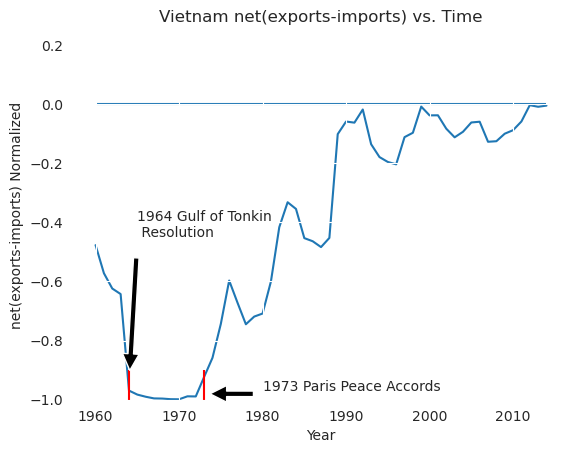

In [33]:
country = "Vietnam"
category = "net(exports-imports)"
plt.figure()
plt.plot(data[data["country"] == country]["year"],data[data["country"] == country][category]/(data[data["country"] == country]["imports"]+data[data["country"] == country]["exports"]))
plt.title(country + ' ' + category +" vs. Time")
plt.xlabel("Year")
plt.hlines(0,1960,2014)
plt.vlines(1964,-1,-0.9,colors='r')
plt.vlines(1973,-1,-0.9,colors='r')
plt.ylim(-1,0.25)
plt.ylabel(category + " Normalized")
plt.annotate("1964 Gulf of Tonkin\n Resolution",xy=(1964,-.95),
            xytext=(1965,-0.45),
            arrowprops = dict(facecolor='black',shrink=0.1))
plt.annotate("1973 Paris Peace Accords",xy=(1973,-.98),
            xytext=(1980,-0.97),
            arrowprops = dict(facecolor='black',shrink=0.1))
plt.savefig("vietnam_imports.png")